In [191]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import datasets
from scipy.stats import norm
from scipy.integrate import simpson
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression

In [193]:
data_df = pd.read_csv('Dataset/boston_house_price.csv')

In [195]:
data_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [197]:
for col in data_df.columns:
    print(f'{col}: {data_df[col].unique()}\n')

CRIM: [6.32000e-03 2.73100e-02 2.72900e-02 3.23700e-02 6.90500e-02 2.98500e-02
 8.82900e-02 1.44550e-01 2.11240e-01 1.70040e-01 2.24890e-01 1.17470e-01
 9.37800e-02 6.29760e-01 6.37960e-01 6.27390e-01 1.05393e+00 7.84200e-01
 8.02710e-01 7.25800e-01 1.25179e+00 8.52040e-01 1.23247e+00 9.88430e-01
 7.50260e-01 8.40540e-01 6.71910e-01 9.55770e-01 7.72990e-01 1.00245e+00
 1.13081e+00 1.35472e+00 1.38799e+00 1.15172e+00 1.61282e+00 6.41700e-02
 9.74400e-02 8.01400e-02 1.75050e-01 2.76300e-02 3.35900e-02 1.27440e-01
 1.41500e-01 1.59360e-01 1.22690e-01 1.71420e-01 1.88360e-01 2.29270e-01
 2.53870e-01 2.19770e-01 8.87300e-02 4.33700e-02 5.36000e-02 4.98100e-02
 1.36000e-02 1.31100e-02 2.05500e-02 1.43200e-02 1.54450e-01 1.03280e-01
 1.49320e-01 1.71710e-01 1.10270e-01 1.26500e-01 1.95100e-02 3.58400e-02
 4.37900e-02 5.78900e-02 1.35540e-01 1.28160e-01 8.82600e-02 1.58760e-01
 9.16400e-02 1.95390e-01 7.89600e-02 9.51200e-02 1.01530e-01 8.70700e-02
 5.64600e-02 8.38700e-02 4.11300e-02 4.46200e

In [199]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


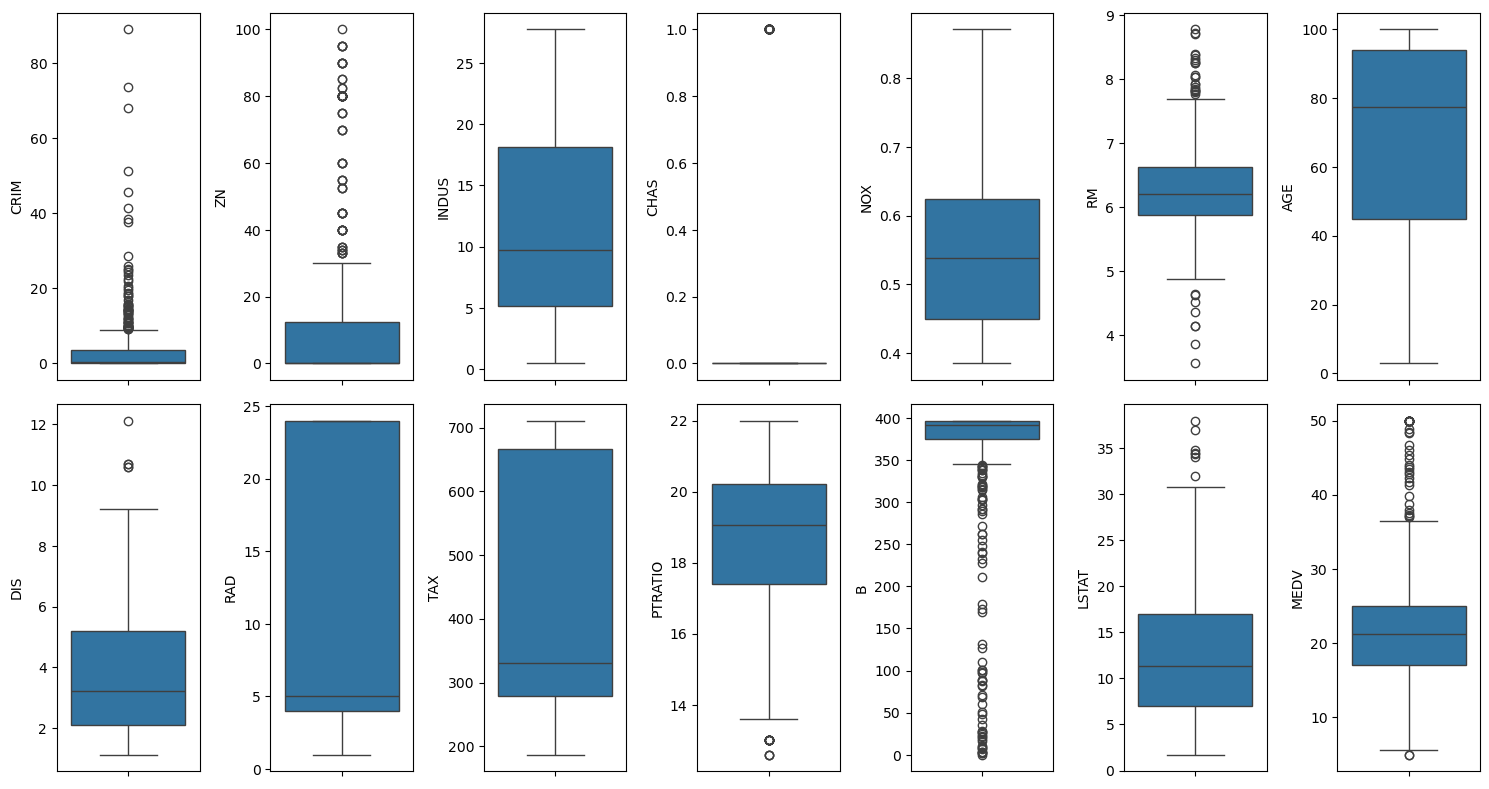

In [201]:
fig,axes = plt.subplots(2,7, figsize =(15,8))#preppare for plotting
axes = axes.ravel()#axes convrt from 1d to 2d
for count,col in enumerate(data_df.columns):
    ax= axes[count]
    sns.boxplot(data= data_df, y=col, ax=ax)

plt.tight_layout()

In [202]:
outlier_list = []
for count, col in enumerate(data_df.columns):
    Q1= np.percentile(data_df[col],25)
    Q3= np.percentile(data_df[col],75)
    IQR = Q3-Q1
    ol_dist= IQR*1.5
    outlier_list.extend(data_df[data_df[col]<Q1 - ol_dist].index)
    outlier_list.extend(data_df[data_df[col]>Q3 + ol_dist].index)

from collections import Counter
outlier_count = Counter(outlier_list)
outlier_count
    

Counter({412: 4,
         414: 4,
         283: 4,
         367: 3,
         374: 3,
         384: 3,
         438: 3,
         195: 3,
         203: 3,
         204: 3,
         162: 3,
         163: 3,
         257: 3,
         262: 3,
         267: 3,
         371: 2,
         373: 2,
         386: 2,
         387: 2,
         398: 2,
         399: 2,
         404: 2,
         405: 2,
         406: 2,
         407: 2,
         409: 2,
         410: 2,
         411: 2,
         413: 2,
         415: 2,
         416: 2,
         417: 2,
         418: 2,
         419: 2,
         420: 2,
         422: 2,
         425: 2,
         426: 2,
         427: 2,
         429: 2,
         431: 2,
         434: 2,
         435: 2,
         436: 2,
         437: 2,
         444: 2,
         445: 2,
         454: 2,
         190: 2,
         196: 2,
         197: 2,
         198: 2,
         202: 2,
         256: 2,
         274: 2,
         276: 2,
         277: 2,
         286: 2,
         291: 

In [203]:
data_df.iloc[[412,414,283]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
412,18.81100,0.0,18.10,0.0,0.597,4.628,100.0,1.5539,24.0,666.0,20.2,28.79,34.37,17.9
414,45.74610,0.0,18.10,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0
283,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0


In [204]:
data_df = data_df.drop([412,414,283], axis=0 ).copy()
data_df = data_df[data_df['MEDV']<50].copy()
data_df.reset_index(inplace=True, drop=True)
data_df.shape

(488, 14)

<Axes: >

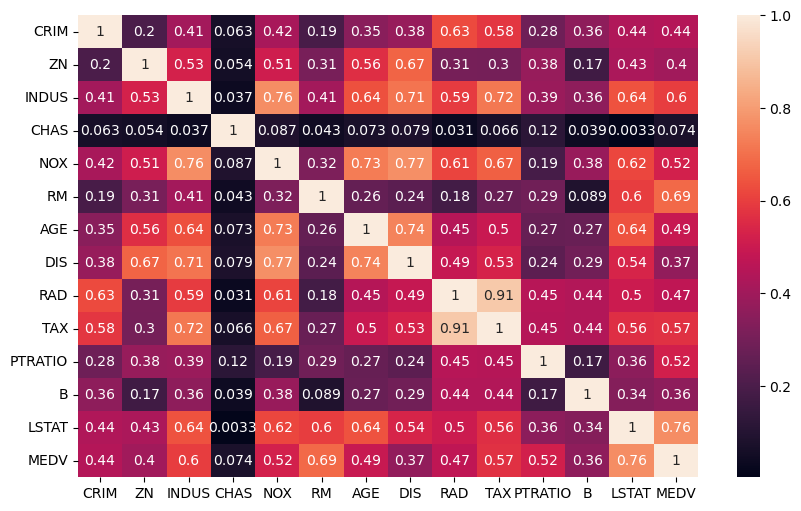

In [205]:
plt.figure(figsize=(10, 6))
sns.heatmap(data_df.corr().abs(), annot=True)

In [207]:
colums_sels=['LSTAT','INDUS','NOX','PTRATIO','RM','TAX']

scaler = MinMaxScaler()

features = data_df[colums_sels].copy()

target = data_df['MEDV']

In [211]:
features = pd.DataFrame(data=scaler.fit_transform(features),
                       columns=colums_sels)
features.head()

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX
0,0.083356,0.058148,0.314815,0.287234,0.577505,0.208015
1,0.198944,0.234444,0.172840,0.553191,0.547998,0.104962
2,0.056960,0.234444,0.172840,0.553191,0.694386,0.104962
3,0.026674,0.053333,0.150206,0.648936,0.658555,0.066794
4,0.093081,0.053333,0.150206,0.648936,0.687105,0.066794


In [212]:
reg = LinearRegression()

reg.fit(features, target)

y_pred = reg.predict(features)

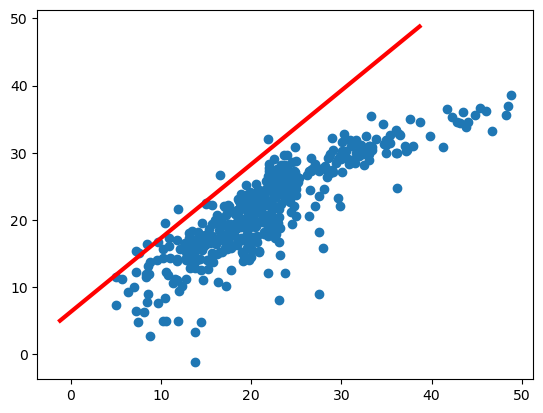

In [219]:
plt.scatter(target, y_pred)
plt.plot([y_pred.min(), y_pred.max()], [target.min(), target.max()], c='r', lw=3)

In [221]:
mean_squared_error(y_pred=y_pred, y_true =target)

16.137851951377435